<a href="https://colab.research.google.com/github/mirrorball108/face_mask_detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

binary classification problem, solved using deep learning

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:07<00:00, 26.9MB/s]
100% 163M/163M [00:07<00:00, 23.4MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall()
zip_ref.close()

In [4]:
#importing dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [5]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2089.jpg', 'with_mask_919.jpg', 'with_mask_2759.jpg', 'with_mask_2841.jpg', 'with_mask_371.jpg']
['with_mask_553.jpg', 'with_mask_3595.jpg', 'with_mask_1069.jpg', 'with_mask_1207.jpg', 'with_mask_639.jpg']


In [6]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3509.jpg', 'without_mask_3530.jpg', 'without_mask_3754.jpg', 'without_mask_593.jpg', 'without_mask_2040.jpg']
['without_mask_46.jpg', 'without_mask_1140.jpg', 'without_mask_67.jpg', 'without_mask_557.jpg', 'without_mask_3102.jpg']


In [7]:
print('no. of with mask images',len(with_mask_files))
print('no. of without mask images',len(without_mask_files))

no. of with mask images 3725
no. of without mask images 3828


**Creating labels for the two classes**

In [8]:
#with mask --- 1
#without mak=sk --0

#creating labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


**Displaying the images**

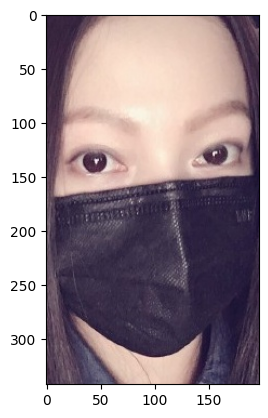

In [10]:
#displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_22.jpg')
imgplot=plt.imshow(img)
plt.show()

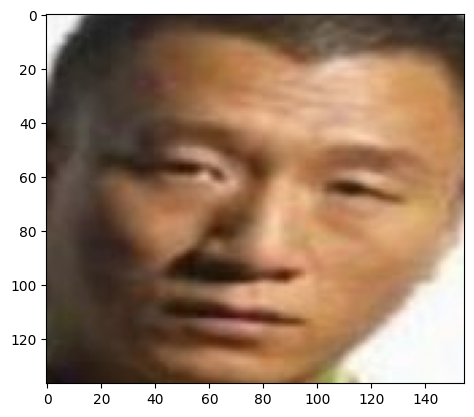

In [11]:
#displaying without mask image
img=mpimg.imread('/content/data/without_mask/without_mask_3210.jpg')
imgplot=plt.imshow(img)
plt.show()

**Image Processing**

1.resize images

2.convert them to numpy arrays


In [12]:
#convert images to numpy arrays
with_mask_path='/content/data/with_mask/'
without_mask_path='/content/data/without_mask/'

data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)





/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
type(data)

list

In [14]:
type(data[0])

numpy.ndarray

In [15]:
len(data)

7553

array([[[136, 135, 130],
        [133, 132, 127],
        [136, 132, 129],
        ...,
        [ 11,  11,   9],
        [ 10,  10,   8],
        [ 10,  10,   8]],

       [[141, 140, 135],
        [144, 143, 138],
        [150, 146, 143],
        ...,
        [ 11,  11,   9],
        [ 11,  11,   9],
        [ 11,  11,   9]],

       [[151, 150, 145],
        [157, 156, 151],
        [162, 158, 155],
        ...,
        [ 12,  12,  10],
        [ 12,  12,  10],
        [ 12,  12,  10]],

       ...,

       [[214, 213, 209],
        [215, 214, 210],
        [216, 215, 210],
        ...,
        [187, 152, 114],
        [190, 151, 114],
        [190, 151, 114]],

       [[215, 214, 210],
        [216, 215, 211],
        [217, 216, 211],
        ...,
        [186, 151, 113],
        [187, 151, 113],
        [187, 151, 113]],

       [[217, 216, 212],
        [217, 216, 212],
        [218, 217, 212],
        ...,
        [184, 150, 112],
        [184, 150, 112],
        [185, 151, 113]]], dtype=uint8)
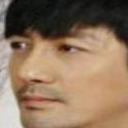

In [16]:
data[4985]

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
#converting image list and label list to numpy array

x=np.array(data)
y=np.array(labels)


In [19]:
type(y)

numpy.ndarray

In [20]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


**train test split**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [23]:
#scaling your data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

**Building a convolutional neural network(CNN)**

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes=2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [26]:
#compiling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])



In [27]:
#training the neural network

history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)


Epoch 1/5
170/170 [==============================] - 146s 853ms/step - loss: 0.4843 - acc: 0.8065 - val_loss: 0.2796 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 154s 906ms/step - loss: 0.2825 - acc: 0.8878 - val_loss: 0.2402 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 144s 844ms/step - loss: 0.2275 - acc: 0.9126 - val_loss: 0.2315 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 147s 867ms/step - loss: 0.1942 - acc: 0.9235 - val_loss: 0.2183 - val_acc: 0.9190
Epoch 5/5
170/170 [==============================] - 143s 841ms/step - loss: 0.1467 - acc: 0.9408 - val_loss: 0.2677 - val_acc: 0.8942


**Model Evaluation**

In [28]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('Test Accuracy = ',accuracy)

48/48 [==============================] - 11s 230ms/step - loss: 0.2072 - acc: 0.9212
Test Accuracy =  0.921244204044342


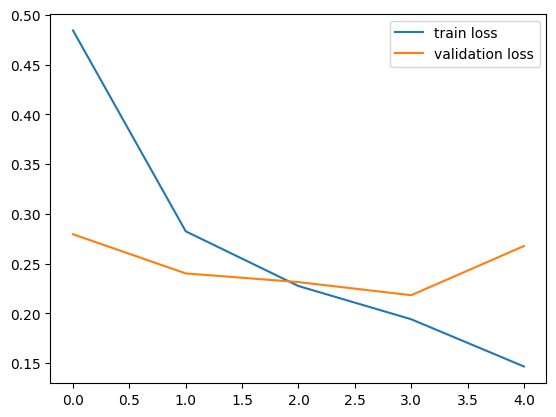

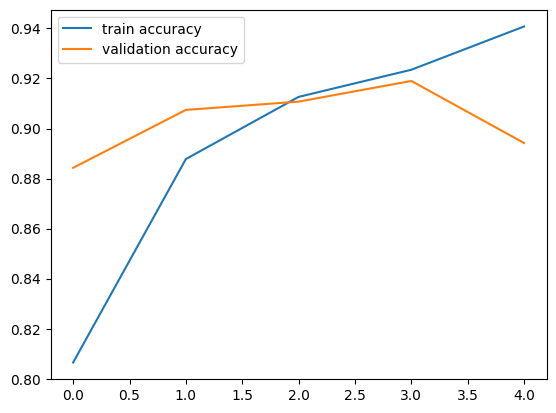

In [29]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**predictive system**

path pf the image to be predicted : /content/photo-1598207951491-255eaf139751.webp


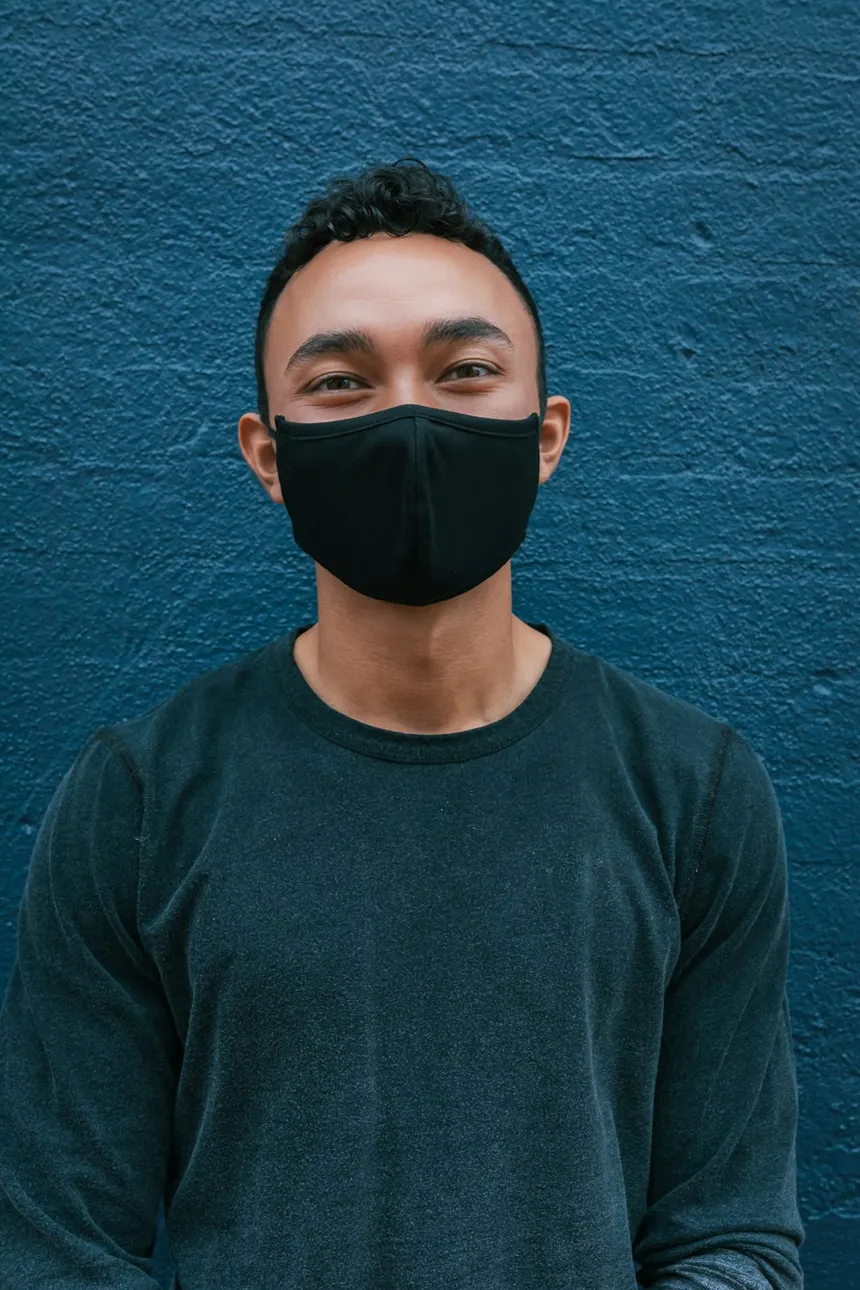

1/1 [==============================] - 0s 196ms/step
[[0.27128106 0.6610037 ]]
1
person is wearing the mask


In [30]:
input_image_path=input('path pf the image to be predicted : ')
input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label ==1:
  print('person is wearing the mask')
else:
  print('person is not wearing a mask')

